# k-Nearest Neighbor (kNN) assignment

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Mnist dataset 불러오기

In [5]:
from sklearn.datasets import fetch_openml

# load mnist data
mnist_data = fetch_openml('mnist_784')
X_data = mnist_data.data
Y_data = mnist_data.target.astype('int32')

# shuffling data
shuffle_mask = np.arange(X_data.shape[0])
np.random.shuffle(shuffle_mask)
X_data = X_data[shuffle_mask]
Y_data = Y_data[shuffle_mask]

# divide data : train, test data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10000, 784)
(1000, 784)
(10000,)
(1000,)


# Mnist 이미지 출력

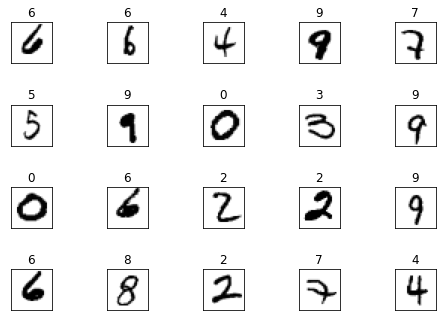

In [3]:
sample_X = X_train[:20]
sample_Y = Y_train[:20]

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%sample_Y[i])
    subplot.imshow(sample_X[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

# # Problem 1 (10 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 두번 사용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- distance matrix(dist_mat) : numpy array of shape (test data 수, train data 수). (dist_mat[i,j] : i번째 test data와 j번째 train data 사이의 거리)
- 거리는 L2 distance로 구할 것.

In [4]:
def Problem_1(X_test, X_train):
    
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    print()
    print()
    
    for i in range(test_num):
        

        for j in range(train_num):
            dist_mat[i][j] = np.linalg.norm(X_test[i]-X_train[j])

            ############ Put your code here ################
            
            ################################################
    return dist_mat




[[3051.29021891 2599.02827995 2751.30459964 ... 3121.84048279
  2743.19722222 2937.00953352]
 [2286.41837816 2335.16830229 2378.12825558 ... 2757.62379595
  2432.85922322 2551.7143257 ]
 [2756.31148457 2639.79146904 3005.12795069 ... 2988.39906974
  2850.7532338  3153.03631441]
 ...
 [2209.57348826 2878.32885543 2285.28028915 ... 2954.29128557
  2447.57144942 2450.91982733]
 [2674.01738962 2518.02402689 2789.7247176  ... 3109.58695006
  2815.24776885 2806.08481696]
 [2855.10087387 2893.33077957 2648.38932183 ... 3189.56156862
  2695.52814862 2563.10904957]]


# # Problem 2 (20 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 사용하지 않고 numpy 연산만을 이용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- L2 distance로 거리를 구할 것.

In [11]:
def Problem_2(X_test, X_train):
    
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    ############# Put your code here ################
    dist_mat = np.sqrt( np.tile ( np.sum(np.square(X_train), axis=1),
                                 (test_num, 1)) + np.tile(np.sum(np.square(X_test), axis=1),
                                                          (train_num, 1)).T - 2 * np.dot(X_test, X_train.T))
    #################################################        
    return dist_mat


print(Problem_2(X_test, X_train))


[[3051.29021891 2599.02827995 2751.30459964 ... 3121.84048279
  2743.19722222 2937.00953352]
 [2286.41837816 2335.16830229 2378.12825558 ... 2757.62379595
  2432.85922322 2551.7143257 ]
 [2756.31148457 2639.79146904 3005.12795069 ... 2988.39906974
  2850.7532338  3153.03631441]
 ...
 [2209.57348826 2878.32885543 2285.28028915 ... 2954.29128557
  2447.57144942 2450.91982733]
 [2674.01738962 2518.02402689 2789.7247176  ... 3109.58695006
  2815.24776885 2806.08481696]
 [2855.10087387 2893.33077957 2648.38932183 ... 3189.56156862
  2695.52814862 2563.10904957]]


# # Problem 3 (10 pts)
time 라이브러리를 이용하여 Problem_1, Problem_2 함수의 실행시간(초)을 측정한 후 비교하고, 두 함수에서 계산된 distance matrix가 같은 matrix임을 보이시오.

In [12]:
import time

dist_mat_two_loop = None
dist_mat_no_loop = None
problem1_time = None
problem2_time = None

############# Put your code here ################
start = time.time()
dist_mat_two_loop = Problem_1(X_test, X_train)
problem1_time = time.time() - start
start = time.time()
dist_mat_no_loop = Problem_2(X_test, X_train)
problem2_time = time.time() - start
#################################################   


print('Problem1 (two for loop) execution time : %f'%problem1_time)
print('Problem2 (no for loop) execution time : %f'%problem2_time)

difference = np.linalg.norm(dist_mat_two_loop - dist_mat_no_loop, ord='fro')
if difference < 0.001:
    print('The distance matrices are the same')
else:
    print('The distance matrices are different')



Problem1 (two for loop) execution time : 65.840994
Problem2 (no for loop) execution time : 0.345431
The distance matrices are the same


# # Problem 4 (10 pts)
KNN 알고리즘으로 test 데이터의 label 값을 예측하여 return 해주는 함수를 만들고, 실제 label 값과 비교하여 예측의 정확도를 구하시오.
- 위에서 구한 distance matrix를 이용.
- k = 3

In [23]:
print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train)
print(dist_mat_no_loop.shape)
print(dist_mat_no_loop.min())


(10000,)
(10000, 784)
(1000, 784)
[3 6 7 ... 2 7 7]
(1000, 10000)
300.67590525348055


In [39]:
def Problem_4(dist_mat, k, Y_train):
    
    test_num = dist_mat.shape[0]
    Y_predict = np.zeros(test_num)

    for i in range(test_num):
        ############# Put your code here ################
#         print(dist_mat[i])
        neighborsidx = dist_mat[i].argsort()[:k] # 가까운 3개 인덱스 반환
        votes = []
        for j in range(k):
             votes.append(Y_train[neighborsidx[j]])
        uniq, count = np.unique(votes, return_counts=True)
        votes_dict = dict(zip(uniq, count))
        Y_predict_one = max(votes_dict.keys(),
                            key=lambda x:votes_dict[x])
#         print(Y_predict_one)
        Y_predict[i] = Y_predict_one
            
            
        
#         Y_predict[i] = neighbor
        #################################################   
#     print(Y_predict)
    return Y_predict
Problem_4(dist_mat_no_loop, 3, Y_train)


y_pred = Problem_4(dist_mat_no_loop, 3, Y_train)
accuracy = None
# ############# Put your code here ################
# print(len(y_pred))
# print(y_pred)
# print(Y_test)


def accuracys(pred, result):
    if len(pred) == len(result):

        acc = 0
        for a in range(len(pred)):
            if pred[a] == result[a]:
                acc += 1
            else:
                pass
    else:
        print("예측값과 정답의 갯수가 다릅니다.")

    return( acc / len(pred) )

accuracy = accuracys(y_pred, Y_test)
# #################################################
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.950000


# # Problem 5 (20 pts)
training 데이터를 split 하여, 5 fold cross validation을 수행하고 최적의 hyper parameter K 를 찾으시오. 또한, cross validation 기법을 사용하는 이유를 조사한 후 간단히 서술하시오.
- numpy 외 다른 라이브러리 사용 금지.
- 위에서 정의한 함수들 이용.
- k_candidate list에 hyper parameter k 후보들을 저장. ex) k_candidate = [3, 5, 7, 10, 15]
- accuracy_dict[x]에 k = x 일때 5개의 validation accuracy 저장. ex) print(accuracy_dict[3]) -> [70.01, 68.93, 54.412, 65.643, 68.85]
- https://www.youtube.com/watch?v=OoUX-nOEjG0&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=2 28분30초~39분30초 참고.

Cross validation 사용 이유 : testset과 trainset이 고정되어 있는경우 모델 튜닝을 하다보면 고정된 특정 testset에 과적합되기 때문에,다른 데이터를 넣었을때 예측이 엉망이 될수 있다. 따라서 데이터를 나눠 test셋을 중복없이 번갈아가며 평가한다.


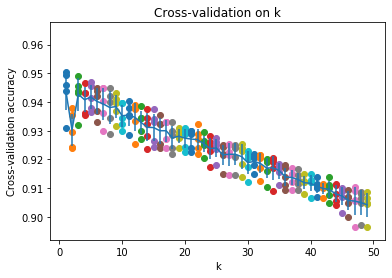

In [65]:
num_fold = 5
k_candidate = range(1, 50)
accuracy_dict = {}
X_train_folds = []
Y_train_folds = []
for k in k_candidate:
    accuracy_dict[k] = []

############# Put your code here ################
splitRange = np.array_split(range(X_train.shape[0]), num_fold) # 나눌 범위 지정
X_train_folds = [ X_train[splitRange[i]] for i in range(num_fold)]
Y_train_folds = [ Y_train[splitRange[i]] for i in range(num_fold)] # 나눠주고

# print(X_train.shape)
# print(splitRange)
# print(X_train_split[4].shape)
#################################################
for i in range(num_fold):
    ############# Put your code here ################
    # 5개로 나눠서 각각 하나는 테스트셋, 나머지는 트레인셋으로 만들어서 테스트후 결과출력
    valiX_test = X_train_folds[i] # 테스트셋
    valiY_test = Y_train_folds[i]
    temp_X_train = np.concatenate(X_train_folds[:i] + X_train_folds[i + 1:]) # 트레인셋
    temp_y_train = np.concatenate(Y_train_folds[:i] + Y_train_folds[i + 1:])     

    #     print(temp_X_train.shape)
    #     print(temp_y_train.shape)
    #     print(distMat.shape)
    distMat = Problem_2(valiX_test, temp_X_train) # 거리 계산        
    #################################################
    for k in k_candidate:
        ############# Put your code here ################
        pred = Problem_4(distMat, k, temp_y_train) # Knn 계산   
        accuracy = accuracys(pred, valiY_test)
#         print(accuracy)
        accuracy_dict[k].append(accuracy) # dick[k]에 추가
#         print(accuracy_dict[k])
        #################################################   
        

        
for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# #Problem 6 (10 pts)
Problem5 에서 구한 best hyperparameter k와 Problem4에서 작성한 함수를 이용하여 test 데이터의 label 값을 예측하고, 정확도를 구하시오.

In [67]:
best_k = 1 ##### Your best k ##########

y_pred = Problem_4(dist_mat_no_loop, best_k, Y_train)
accuracy = None
############# Put your code here ################
accuracy = accuracys(y_pred, Y_test)            
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.953000


# #Problem 7 (20 pts)
Problem5, Problem6의 과정을 Scikit-learn 라이브러리를 이용하여 수행하시오.
- sklearn.neighbors.KNeighborsClassifier, sklearn.model_selection.cross_val_score 함수 사용법을 구글링 해볼 것.

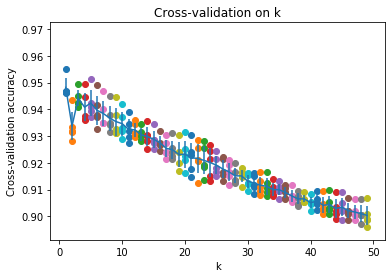

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# k_candidate = range(1, 50)
k_candidate = range(1, 50)
accuracy_dict = {}
for k in k_candidate:
    accuracy_dict[k] = []

for k in k_candidate:
    ############# Put your code here ################
        knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train, Y_train) # 이건 학습
#         knn.score(X_test, Y_test) # 이건 점수
        accuracy_dict[k]=cross_val_score(knn, X_train, Y_train, cv=5)        
        
    #################################################   


for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [17]:
best_k = 1 ##### Your best k ##########

y_pred = None

accuracy = None
############# Put your code here ################
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
accuracy = knn.score(X_test, Y_test)

#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.957000


# #Problem 8 (50 pts)
Numpy Library만 사용하여 MLP(one hidden layer)를 사용하는 Softmax Classifier를 만드시오.
- 입력된 텐서의 원 핫 인코딩된 값을 result에 저장한 후 result를 return하는 함수(one_hot_encoding) 만들시오.  
   [n,] -> [n,class_]
- 입력된 텐서의 softmax값을 result에 저장한 후 result를 return하는 함수(softmax_func)를 만들시오.  
   [n,10] -> [n,10]
   
- 입력된 텐서를 MLP에 통과시켜 예측값을 result에 저장한 후 result를 return하는 함수(forward)를 만들시오.   
   [n,784],[784,hidden_node],[hidden_node,10] -> [n,10]
   
- MLP의 Weights의 gradient를 계산하여 w1_grad,w2_grad에 저장한 후 w1_grad,w2_grad를 return하는 함수(gradient) 만들시오.    
   [n,784],[784,hidden_node],[hidden_node,10],[n,10],[n,10] -> [784,hidden_node],[hidden_node,10]
- Test Accuracy가 90%가 넘는 hyperparameter(hidden node 개수, learning rate, epoch 수)를 찾아내시오.
- Numpy Library외 사용금지 
- MLP의 Hidden Layer의 activation function은 ReLU함수를 사용할 것.
- Loss Function은 Cross-Entropy를 사용할 것.


In [6]:
from sklearn.metrics import accuracy_score
#Relu 함수
ReLU = lambda x:np.maximum(0.0,x)
#Relu의 Derivate 구해주는 함수
dReLU = lambda x:np.float32(x>0.0)

#원핫 인코딩
def one_hot_encoding(y,class_=10):
    result=np.ones((y.shape[0],class_)) # 1로 가득찬 배열
    
    ############# Put your code here ################
    result = np.eye(class_)[y]
    #################################################
    return result


def softmax_func(x_data):
    result = np.ones(x_data.shape)
    
    ############# Put your code here ################
    result = x_data - (x_data.max(axis=1).reshape([-1, 1]))
    result = np.exp(result)
    result /= result.sum(axis=1).reshape([-1, 1])  
    #################################################    
    return result


def forward(x,w1,w2):
    result = np.ones((x.shape[0],10)) # result = outputnodes
    
    ############# Put your code here ################
    a1 = x.dot(w1)
    sa1 = ReLU(a1)
    a2 = sa1.dot(w2)
    sa2 = softmax_func(a2)
    result = sa2
    #################################################
    
    return result


def gradient(x,w1,w2,y_true,y_pred):
    w1_grad = np.ones(w1.shape)
    w2_grad = np.ones(w2.shape)
    
    ############# Put your code here ################
    
    error = y_pred-y_true
    
    
    a1 = x.dot(w1)
    sa1 = ReLU(a1)
    d2 = np.matmul(error, w2.T)
    d1 = dReLU(sa1)    
    
    w1_grad = x.T.dot(d1 * d2)
    w2_grad = sa1.T.dot(error)
    #################################################
    
    return w1_grad, w2_grad


class Model():
    def __init__(self, input_shape, hidden_shape, output_shape,learning_rate):
        #initialize weights
        self.W1 = np.random.normal(0.0, input_shape**(-1/2), (input_shape,hidden_shape))
        self.W2 = np.random.normal(0.0, hidden_shape**(-1/2), (hidden_shape,output_shape))
        self.lr = learning_rate

        
    def train(self,epoch,X_train,Y_train):
        for i in range(epoch):
            Y_pred = forward(X_train,self.W1,self.W2)
            W1_grad , W2_grad = gradient(X_train,self.W1,self.W2,Y_train,Y_pred)
            self.W1 -= self.lr*W1_grad
            self.W2 -= self.lr*W2_grad
    def predict(self,X_test):
        Y_pred = forward(X_test,self.W1,self.W2)
        return Y_pred
    

    
#Prepare & Normalize Data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]
Y_train_enc = one_hot_encoding(Y_train,10)

X_train = X_train/255
X_test = X_test/255


#Initialize Model and train

############# hyperparemter tuning ################
my_model = Model(784, hidden_shape = 100, output_shape = 10, learning_rate = 0.0001)
my_model.train(epoch = 100, X_train = X_train, Y_train = Y_train_enc)
###################################################
print('Your score on test dataset :',accuracy_score(np.argmax(my_model.predict(X_test),axis=1),Y_test))

Your score on test dataset : 0.931
